In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [7]:
import math, sys
import numpy as np
import numpy.random as rd
import pandas as pd
import scipy
from scipy import stats as st
from datetime import  datetime as dt
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

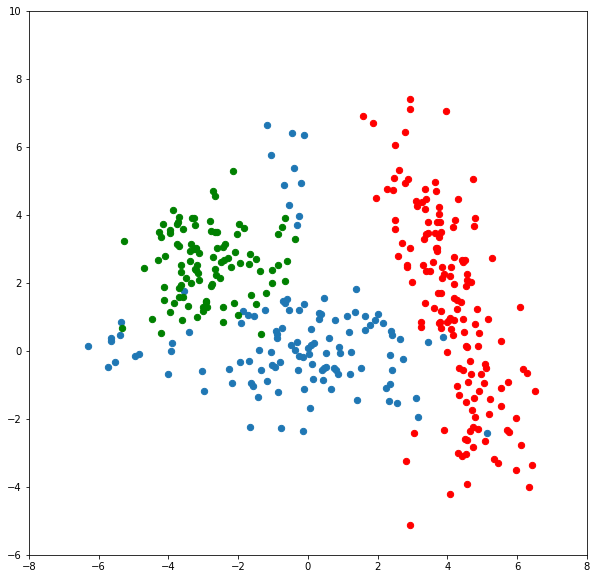

In [8]:
# 図4.1に似たテストデータを無理矢理生成
rd.seed(71)
n_data = 100

cov11 = [[ 4,  0],
        [ 0, 1]]
x11 = st.multivariate_normal.rvs(mean=[ 0, 0], cov=cov11, size=n_data)

cov12 = [[ .1,  -.1],
         [ -.1, .5]]
x12 = st.multivariate_normal.rvs(mean=[-.5, 5], cov=cov12, size=10)

cov13 = [[ .5,  0],
         [ 0, .2]]
x13 = st.multivariate_normal.rvs(mean=[-5, 0], cov=cov13, size=10)

x1 = np.r_[x11, x12, x13]

cov2 = [[ 1,  0],
        [ 0, 1]]
x2 = st.multivariate_normal.rvs(mean=[ -3, 2.5], cov=cov2, size=n_data)

cov31 = [[ 0.5,  -1],
        [ -1, 5]]
x31 = st.multivariate_normal.rvs(mean=[ 4, 2], cov=cov31, size=n_data)
cov32 = [[ 0.2,  -1],
        [ -1, 0.5]]
x32 = st.multivariate_normal.rvs(mean=[ 2, 6], cov=cov31, size=10)
cov33 = [[ 1,  0.7],
        [ 0.7, 2]]
x33 = st.multivariate_normal.rvs(mean=[ 5, -2], cov=cov33, size=40)


x3 = np.r_[x31, x32, x33]

X = np.r_[x1,x2,x3]
y = np.asanyarray([0]*len(x1) + [1]*len(x2) + [2]*len(x3))

plt.figure(figsize=(10,10))
plt.xlim(-8,  8)
plt.ylim(-6, 10)
plt.scatter(x1[:,0], x1[:,1], s=40)
plt.scatter(x2[:,0], x2[:,1], s=40, c="g")
plt.scatter(x3[:,0], x3[:,1], s=40, c="r")

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [16]:
# LDAにかける
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

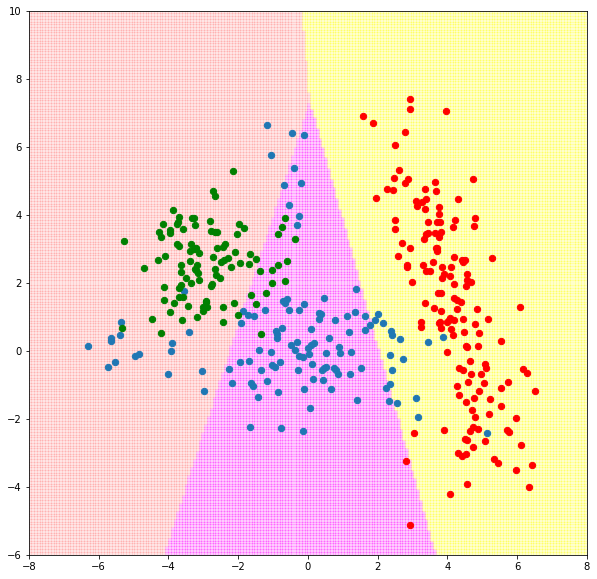

In [26]:
# グラフ表示
xx, yy = np.meshgrid(np.linspace(-8,  8, 201), np.linspace(-6, 10, 201))
z = clf.predict(np.c_[xx.flatten(), yy.flatten()]).reshape(201,201)
plt.figure(figsize=(10,10))
plt.xlim(-8,  8)
plt.ylim(-6, 10)
#plt.pcolor(xx, yy, z, alpha=0.2)
plt.pcolor(xx, yy, z, alpha=0.2)
plt.spring()

plt.scatter(x1[:,0], x1[:,1], s=40)
plt.scatter(x2[:,0], x2[:,1], s=40, c="g")
plt.scatter(x3[:,0], x3[:,1], s=40, c="r")


In [32]:
z

array([[1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2]])

In [19]:
# 2乗と交差積を含む形に拡張

x1_2 = X[:,0]**2
x2_2 = X[:,1]**2
x12 = X[:,0]*X[:,1]

X2 = np.c_[X, x1_2, x2_2, x12]

In [21]:
X2.shape

(370, 5)

In [22]:
X.shape

(370, 2)

In [33]:
# 再度LDAにかける
clf = LinearDiscriminantAnalysis()
clf.fit(X2, y)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

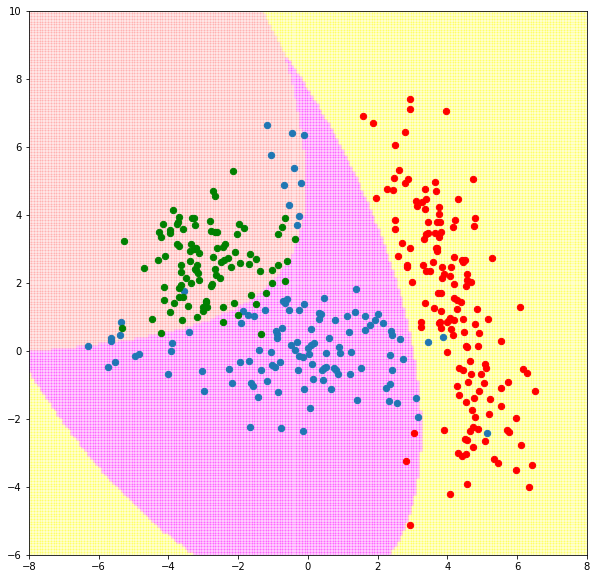

In [34]:
# グラフ表示(2乗と交差積を含むLDA)
xx, yy = np.meshgrid(np.linspace(-8,  8, 201), np.linspace(-6, 10, 201))
z = clf.predict(np.c_[xx.flatten(), yy.flatten(), xx.flatten()**2, yy.flatten()**2, yy.flatten()*xx.flatten()]).reshape(201,201)
plt.figure(figsize=(10,10))
plt.xlim(-8,  8)
plt.ylim(-6, 10)
plt.pcolor(xx, yy, z, alpha=0.2)
plt.spring()

plt.scatter(x1[:,0], x1[:,1], s=40)
plt.scatter(x2[:,0], x2[:,1], s=40, c="g")
plt.scatter(x3[:,0], x3[:,1], s=40, c="r")

plt.show()